# Submission - Inquisitive_Turtles

In [230]:
import kagglehub
path = kagglehub.dataset_download("schran/insurance-premium-prediction")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance-premium-prediction


In [231]:
import pandas as pd
df = pd.read_csv('/kaggle/input/insurance-premium-prediction/Insurance Premium Prediction Dataset.csv')
print(df.columns,df.dtypes)

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Premium Amount',
       'Policy Start Date', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object') Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age               int64
Credit Score            float64
Insurance Duration        int64
Premium Amount          float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency

In [232]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,274175.000000,264905.000000,250974.000000,268263.000000,197572.000000,278860.000000,250974.000000,278860.000000,277019.000000
mean,41.020771,42089.085329,1.998048,28.584290,0.998117,9.520283,574.362049,5.007764,966.118667
std,13.549683,35444.517255,1.412312,15.966208,1.000795,5.767915,158.792037,2.581349,909.404567
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13588.000000,1.000000,16.149890,0.000000,5.000000,437.000000,3.000000,286.000000
50%,41.000000,32191.000000,2.000000,26.451244,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,62164.000000,3.000000,38.966369,2.000000,15.000000,712.000000,7.000000,1367.000000
max,64.000000,149997.000000,4.000000,93.876090,9.000000,19.000000,849.000000,9.000000,4999.000000


In [233]:
missing_values = df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0]
print(cols_with_missing)

Age                      4685
Annual Income           13955
Marital Status           5019
Number of Dependents    27886
Occupation              81288
Health Score            10597
Previous Claims         81288
Credit Score            27886
Premium Amount           1841
Customer Feedback       18349
dtype: int64


Getting rid of null values in target column

In [234]:
df = df.dropna(subset = 'Premium Amount')

In [235]:
missing_values = df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0]
print(cols_with_missing)

Age                      4658
Annual Income           13851
Marital Status           4991
Number of Dependents    27689
Occupation              80748
Health Score            10525
Previous Claims         80749
Credit Score            27700
Customer Feedback       18258
dtype: int64


In [236]:
df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,272361.000000,263168.000000,249330.000000,266494.000000,196270.000000,277019.000000,249319.000000,277019.000000,277019.000000
mean,41.020139,42095.013159,1.998267,28.583739,0.998105,9.519318,574.389365,5.007898,966.118667
std,13.548304,35443.338341,1.412300,15.964010,1.000770,5.767438,158.794989,2.581473,909.404567
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13591.000000,1.000000,16.149422,0.000000,5.000000,437.000000,3.000000,286.000000
50%,41.000000,32207.000000,2.000000,26.448428,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,62176.500000,3.000000,38.964028,2.000000,15.000000,712.000000,7.000000,1367.000000
max,64.000000,149997.000000,4.000000,93.876090,9.000000,19.000000,849.000000,9.000000,4999.000000


In [237]:
Q1 = df['Previous Claims'].quantile(0.25)
Q3 = df['Previous Claims'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Previous Claims'] >= lower_bound) & (df['Previous Claims'] <= upper_bound)]
df_outliers = df[(df['Previous Claims'] < lower_bound) | (df['Previous Claims'] > upper_bound)]

print('number of outliers: ',df_outliers['Previous Claims'].count())
print("Original DataFrame with outliers:",df['Previous Claims'].count())
print("DataFrame after removing outliers:",df_cleaned['Previous Claims'].count())

number of outliers:  117
Original DataFrame with outliers: 196270
DataFrame after removing outliers: 196153


In [238]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,192857.000000,186380.000000,176596.000000,188706.000000,196153.000000,196153.000000,176456.000000,196153.000000,196153.000000
mean,41.002276,42048.496631,1.999219,28.569734,0.994973,9.507670,574.588645,5.011608,965.925660
std,13.540229,35408.827384,1.412334,15.967410,0.992727,5.767753,158.823202,2.581916,908.763664
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,29.000000,13616.750000,1.000000,16.133740,0.000000,4.000000,437.000000,3.000000,287.000000
50%,41.000000,32167.000000,2.000000,26.424062,1.000000,10.000000,575.000000,5.000000,688.000000
75%,53.000000,62015.750000,3.000000,38.909943,2.000000,15.000000,712.000000,7.000000,1365.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000


In [239]:
mean_imputation_cols = ['Age','Number of Dependents','Credit Score','Credit Score']

In [240]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df_cleaned[mean_imputation_cols]= imputer.fit_transform(df_cleaned[mean_imputation_cols])
print(df_cleaned)



         Age  Gender  Annual Income Marital Status  Number of Dependents  \
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
5       38.0    Male        31769.0        Married                   1.0   
6       56.0  Female        26209.0         Single                   1.0   
7       36.0    Male         8762.0         Single                   3.0   
...      ...     ...            ...            ...                   ...   
278851  25.0  Female         4630.0       Divorced                   4.0   
278852  47.0  Female        14001.0         Single                   0.0   
278853  28.0  Female        74931.0        Married                   0.0   
278854  63.0    Male        34311.0       Divorced                   0.0   
278855  53.0    Male        22594.0       Divorced                   4.0   

       Education Level     Occupation  Health Score  Location    Policy Type  \
2      

<ipython-input-240-a269f45f3bbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[mean_imputation_cols]= imputer.fit_transform(df_cleaned[mean_imputation_cols])


In [241]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,196153.000000,186380.000000,196153.000000,188706.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000
mean,41.002276,42048.496631,1.999219,28.569734,0.994973,9.507670,574.588645,5.011608,965.925660
std,13.425987,35408.827384,1.340079,15.967410,0.992727,5.767753,150.638007,2.581916,908.763664
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,30.000000,13616.750000,1.000000,16.133740,0.000000,4.000000,452.000000,3.000000,287.000000
50%,41.000000,32167.000000,2.000000,26.424062,1.000000,10.000000,574.588645,5.000000,688.000000
75%,53.000000,62015.750000,3.000000,38.909943,2.000000,15.000000,697.000000,7.000000,1365.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000


In [242]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Annual Income         9773
Marital Status        3490
Occupation           57166
Health Score          7447
Customer Feedback    12959
dtype: int64


In [243]:
mode_imputation_cols=['Annual Income','Health Score']

In [244]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])
print(df_cleaned)


         Age  Gender  Annual Income Marital Status  Number of Dependents  \
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
5       38.0    Male        31769.0        Married                   1.0   
6       56.0  Female        26209.0         Single                   1.0   
7       36.0    Male         8762.0         Single                   3.0   
...      ...     ...            ...            ...                   ...   
278851  25.0  Female         4630.0       Divorced                   4.0   
278852  47.0  Female        14001.0         Single                   0.0   
278853  28.0  Female        74931.0        Married                   0.0   
278854  63.0    Male        34311.0       Divorced                   0.0   
278855  53.0    Male        22594.0       Divorced                   4.0   

       Education Level     Occupation  Health Score  Location    Policy Type  \
2      

<ipython-input-244-3e9759c0bb16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])


In [245]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Marital Status        3490
Occupation           57166
Customer Feedback    12959
dtype: int64


In [246]:
mode_imputation_cols=['Marital Status','Occupation']

In [247]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000
mean,41.002276,40069.837102,1.999219,27.486421,0.994973,9.507670,574.588645,5.011608,965.925660
std,13.425987,35580.637143,1.340079,16.583628,0.992727,5.767753,150.638007,2.581916,908.763664
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,30.000000,11221.000000,1.000000,14.888263,0.000000,4.000000,452.000000,3.000000,287.000000
50%,41.000000,29925.000000,2.000000,25.592391,1.000000,10.000000,574.588645,5.000000,688.000000
75%,53.000000,59886.000000,3.000000,38.313994,2.000000,15.000000,697.000000,7.000000,1365.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000


In [248]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])
print(df_cleaned)


         Age  Gender  Annual Income Marital Status  Number of Dependents  \
2       32.0  Female        30154.0       Divorced                   3.0   
3       60.0  Female        48371.0       Divorced                   0.0   
5       38.0    Male        31769.0        Married                   1.0   
6       56.0  Female        26209.0         Single                   1.0   
7       36.0    Male         8762.0         Single                   3.0   
...      ...     ...            ...            ...                   ...   
278851  25.0  Female         4630.0       Divorced                   4.0   
278852  47.0  Female        14001.0         Single                   0.0   
278853  28.0  Female        74931.0        Married                   0.0   
278854  63.0    Male        34311.0       Divorced                   0.0   
278855  53.0    Male        22594.0       Divorced                   4.0   

       Education Level     Occupation  Health Score  Location    Policy Type  \
2      

<ipython-input-248-3e9759c0bb16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[mode_imputation_cols]= imputer.fit_transform(df_cleaned[mode_imputation_cols])


In [249]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Customer Feedback    12959
dtype: int64


In [250]:
df_cleaned['Customer Feedback']= df_cleaned['Customer Feedback'].fillna('')

<ipython-input-250-1308beb94693>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Customer Feedback']= df_cleaned['Customer Feedback'].fillna('')


In [251]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Series([], dtype: int64)


In [252]:
df_cleaned.dtypes

Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age               int64
Credit Score            float64
Insurance Duration        int64
Premium Amount          float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
dtype: object

In [253]:
df_cleaned.shape

(196153, 20)

In [254]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000
mean,41.002276,40069.837102,1.999219,27.486421,0.994973,9.507670,574.588645,5.011608,965.925660
std,13.425987,35580.637143,1.340079,16.583628,0.992727,5.767753,150.638007,2.581916,908.763664
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000
25%,30.000000,11221.000000,1.000000,14.888263,0.000000,4.000000,452.000000,3.000000,287.000000
50%,41.000000,29925.000000,2.000000,25.592391,1.000000,10.000000,574.588645,5.000000,688.000000
75%,53.000000,59886.000000,3.000000,38.313994,2.000000,15.000000,697.000000,7.000000,1365.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000


# One Hot encoding

In [255]:
from sklearn.preprocessing import OneHotEncoder
encoding_cols=['Customer Feedback','Occupation','Education Level','Marital Status',
               'Property Type','Exercise Frequency','Smoking Status','Policy Type','Gender','Location']


encoder = OneHotEncoder(sparse=False)

#Fit and transform the encoding columns
encoded_array = encoder.fit_transform(df_cleaned[encoding_cols])

#Convert the encoded array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(encoding_cols))

# Drop original columns and concatenate encoded columns
df_cleaned = pd.concat([df_cleaned.drop(columns=encoding_cols), encoded_df], axis=1)

# Display the result
print(df_cleaned)

df_cleaned.columns



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


         Age  Annual Income  Number of Dependents  Health Score  \
2       32.0        30154.0                   3.0     14.714909   
3       60.0        48371.0                   0.0     25.346926   
5       38.0        31769.0                   1.0     14.736611   
6       56.0        26209.0                   1.0     33.238300   
7       36.0         8762.0                   3.0     13.887880   
...      ...            ...                   ...           ...   
196137   NaN            NaN                   NaN           NaN   
196138   NaN            NaN                   NaN           NaN   
196139   NaN            NaN                   NaN           NaN   
196142   NaN            NaN                   NaN           NaN   
196146   NaN            NaN                   NaN           NaN   

        Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
2                   2.0         16.0         652.0                 8.0   
3                   1.0         11.0         33

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Policy Start Date', 'Customer Feedback_',
       'Customer Feedback_Average', 'Customer Feedback_Good',
       'Customer Feedback_Poor', 'Occupation_Employed',
       'Occupation_Self-Employed', 'Occupation_Unemployed',
       'Education Level_Bachelor's', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_PhD',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Property Type_Apartment',
       'Property Type_Condo', 'Property Type_House',
       'Exercise Frequency_Daily', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
       'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female',
       'Gender_Male', 'Locati

In [256]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback_,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,...,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000,196153.000000
mean,41.002276,40069.837102,1.999219,27.486421,0.994973,9.507670,574.588645,5.011608,965.925660,0.066066,...,0.498738,0.501262,0.333755,0.331578,0.334667,0.498993,0.501007,0.331552,0.335488,0.332959
std,13.425987,35580.637143,1.340079,16.583628,0.992727,5.767753,150.638007,2.581916,908.763664,0.248398,...,0.500000,0.500000,0.471555,0.470781,0.471875,0.500000,0.500000,0.470772,0.472162,0.471273
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,11221.000000,1.000000,14.888263,0.000000,4.000000,452.000000,3.000000,287.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,29925.000000,2.000000,25.592391,1.000000,10.000000,574.588645,5.000000,688.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,53.000000,59886.000000,3.000000,38.313994,2.000000,15.000000,697.000000,7.000000,1365.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
df_cleaned.head(5)

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
2,32.0,30154.0,3.0,14.714909,2.0,16.0,652.0,8.0,849.0,2023-11-26 15:21:39.078837,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,60.0,48371.0,0.0,25.346926,1.0,11.0,330.0,7.0,927.0,2023-02-27 15:21:39.078837,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,38.0,31769.0,1.0,14.736611,1.0,9.0,521.0,7.0,4016.0,2020-09-16 15:21:39.078837,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,56.0,26209.0,1.0,33.238300,0.0,10.0,424.0,5.0,828.0,2021-03-29 15:21:39.078837,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,36.0,8762.0,3.0,13.887880,1.0,15.0,641.0,9.0,1678.0,2022-12-21 15:21:39.078837,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [258]:
df_cleaned.dtypes

Age                            float64
Annual Income                  float64
Number of Dependents           float64
Health Score                   float64
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Premium Amount                 float64
Policy Start Date               object
Customer Feedback_             float64
Customer Feedback_Average      float64
Customer Feedback_Good         float64
Customer Feedback_Poor         float64
Occupation_Employed            float64
Occupation_Self-Employed       float64
Occupation_Unemployed          float64
Education Level_Bachelor's     float64
Education Level_High School    float64
Education Level_Master's       float64
Education Level_PhD            float64
Marital Status_Divorced        float64
Marital Status_Married         float64
Marital Status_Single          float64
Property Type_Apartment        float64
Property Type_Condo      

In [259]:
df_cleaned = df_cleaned.dropna()

In [260]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback_,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,...,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000
mean,40.988243,40108.399197,1.999313,27.475101,0.996781,9.500192,574.596997,5.009635,965.759484,0.065929,...,0.499953,0.500047,0.333747,0.332268,0.333986,0.499402,0.500598,0.331905,0.335559,0.332536
std,13.421230,35594.487154,1.340000,16.578781,0.993894,5.768777,150.311954,2.581906,908.351252,0.248158,...,0.500002,0.500002,0.471552,0.471028,0.471636,0.500001,0.500001,0.470899,0.472187,0.471124
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,11233.000000,1.000000,14.858647,0.000000,4.000000,453.000000,3.000000,287.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,30004.000000,2.000000,25.576818,1.000000,10.000000,574.588645,5.000000,689.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,53.000000,59897.000000,3.000000,38.324267,2.000000,15.000000,697.000000,7.000000,1364.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [261]:
missing_values = df_cleaned.isnull().sum()
check_missing = missing_values[missing_values > 0]
print(check_missing)

Series([], dtype: int64)


In [262]:
df_cleaned.dtypes

Age                            float64
Annual Income                  float64
Number of Dependents           float64
Health Score                   float64
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Premium Amount                 float64
Policy Start Date               object
Customer Feedback_             float64
Customer Feedback_Average      float64
Customer Feedback_Good         float64
Customer Feedback_Poor         float64
Occupation_Employed            float64
Occupation_Self-Employed       float64
Occupation_Unemployed          float64
Education Level_Bachelor's     float64
Education Level_High School    float64
Education Level_Master's       float64
Education Level_PhD            float64
Marital Status_Divorced        float64
Marital Status_Married         float64
Marital Status_Single          float64
Property Type_Apartment        float64
Property Type_Condo      

In [263]:
df_cleaned['Number of Dependents'].unique()

array([3.        , 0.        , 1.        , 4.        , 2.        ,
       1.99921856])

In [264]:
df_cleaned['Number of Dependents'] = df_cleaned['Number of Dependents'].astype('int32')

In [265]:
df_cleaned['Policy Start Date'] = df_cleaned['Policy Start Date'].astype('datetime64[ns]')

In [266]:
df_cleaned.dtypes

Age                                   float64
Annual Income                         float64
Number of Dependents                    int32
Health Score                          float64
Previous Claims                       float64
Vehicle Age                           float64
Credit Score                          float64
Insurance Duration                    float64
Premium Amount                        float64
Policy Start Date              datetime64[ns]
Customer Feedback_                    float64
Customer Feedback_Average             float64
Customer Feedback_Good                float64
Customer Feedback_Poor                float64
Occupation_Employed                   float64
Occupation_Self-Employed              float64
Occupation_Unemployed                 float64
Education Level_Bachelor's            float64
Education Level_High School           float64
Education Level_Master's              float64
Education Level_PhD                   float64
Marital Status_Divorced           

In [267]:
result = df_cleaned[np.isclose(df_cleaned['Customer Feedback_'],1.)]
print(result['Customer Feedback_'].count())

9094


In [268]:
df_cleaned.count()

Age                            137937
Annual Income                  137937
Number of Dependents           137937
Health Score                   137937
Previous Claims                137937
Vehicle Age                    137937
Credit Score                   137937
Insurance Duration             137937
Premium Amount                 137937
Policy Start Date              137937
Customer Feedback_             137937
Customer Feedback_Average      137937
Customer Feedback_Good         137937
Customer Feedback_Poor         137937
Occupation_Employed            137937
Occupation_Self-Employed       137937
Occupation_Unemployed          137937
Education Level_Bachelor's     137937
Education Level_High School    137937
Education Level_Master's       137937
Education Level_PhD            137937
Marital Status_Divorced        137937
Marital Status_Married         137937
Marital Status_Single          137937
Property Type_Apartment        137937
Property Type_Condo            137937
Property Typ

In [269]:
df_cleaned['Annual Income'].unique()

array([ 30154.,  48371.,  31769., ...,  13682., 117206.,  80941.])

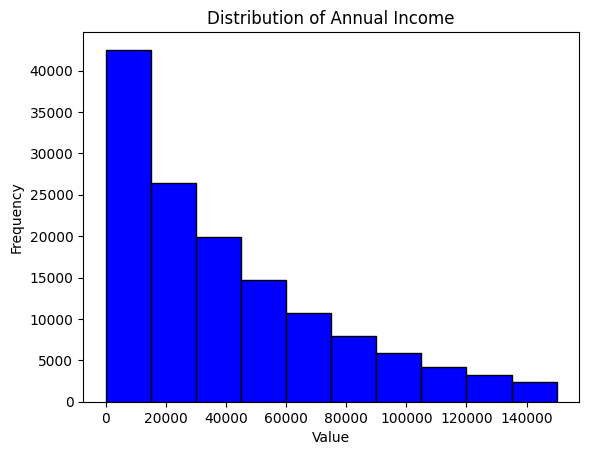

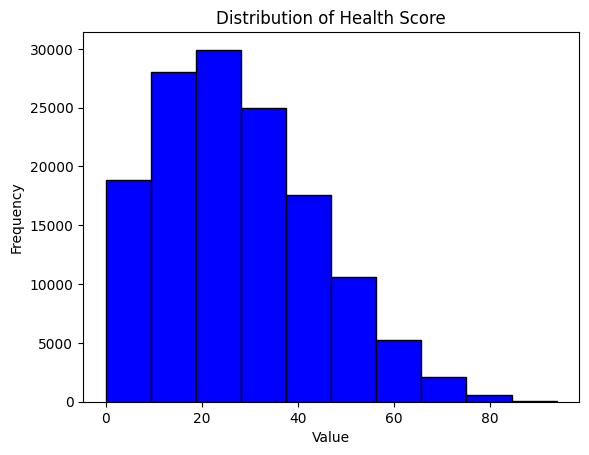

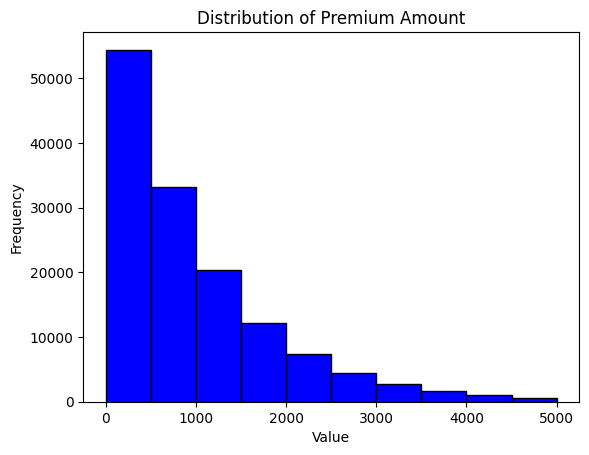

In [270]:
import matplotlib.pyplot as plt
bef=['Annual Income','Health Score','Premium Amount']
for i in range(len(bef)):
    plt.hist(df_cleaned[bef[i]], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {bef[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [271]:
df_cleaned['Health_Score_sqrt'] = df_cleaned['Health Score'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)
df_cleaned['Annual_Income_sqrt'] = df_cleaned['Annual Income'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)
df_cleaned['Premium_Amount_Score_sqrt'] = df_cleaned['Premium Amount'].apply(lambda x: np.sqrt(x))  # Add 1 to avoid log(0)


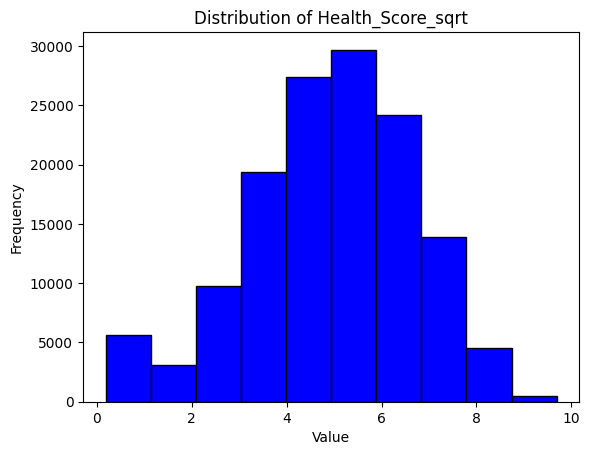

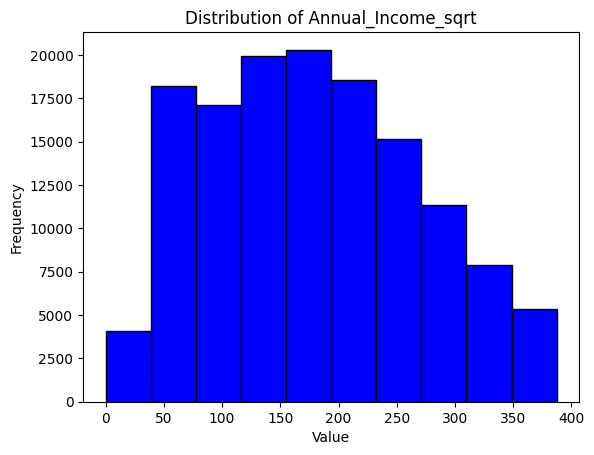

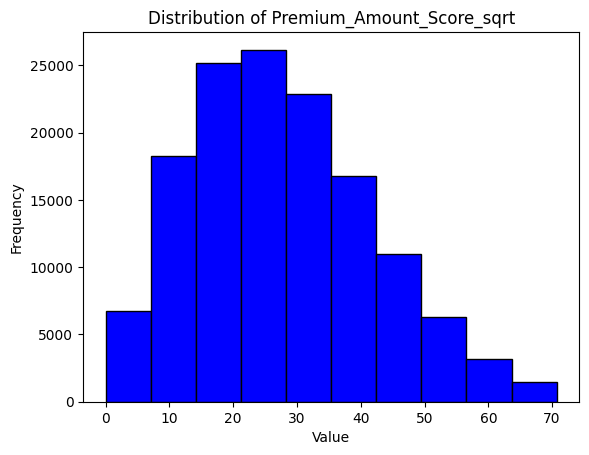

In [272]:
import matplotlib.pyplot as plt
aft=['Health_Score_sqrt','Annual_Income_sqrt','Premium_Amount_Score_sqrt']
for i in range(len(aft)):
    plt.hist(df_cleaned[aft[i]], bins=10, color='blue', edgecolor='black')
    plt.title(f'Distribution of {aft[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [273]:
df_cleaned.dtypes

Age                                   float64
Annual Income                         float64
Number of Dependents                    int32
Health Score                          float64
Previous Claims                       float64
Vehicle Age                           float64
Credit Score                          float64
Insurance Duration                    float64
Premium Amount                        float64
Policy Start Date              datetime64[ns]
Customer Feedback_                    float64
Customer Feedback_Average             float64
Customer Feedback_Good                float64
Customer Feedback_Poor                float64
Occupation_Employed                   float64
Occupation_Self-Employed              float64
Occupation_Unemployed                 float64
Education Level_Bachelor's            float64
Education Level_High School           float64
Education Level_Master's              float64
Education Level_PhD                   float64
Marital Status_Divorced           

In [274]:
df_cleaned.drop(columns=bef)

,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback_,Customer Feedback_Average,Customer Feedback_Good,...,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban,Health_Score_sqrt,Annual_Income_sqrt,Premium_Amount_Score_sqrt
2,32.0,3,2.0,16.0,652.0,8.0,2023-11-26 15:21:39.078837,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.836002,173.649071,29.137605
3,60.0,0,1.0,11.0,330.0,7.0,2023-02-27 15:21:39.078837,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.034573,219.934081,30.446675
5,38.0,1,1.0,9.0,521.0,7.0,2020-09-16 15:21:39.078837,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.838829,178.238604,63.371918
6,56.0,1,0.0,10.0,424.0,5.0,2021-03-29 15:21:39.078837,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.765267,161.891939,28.774989
7,36.0,3,1.0,15.0,641.0,9.0,2022-12-21 15:21:39.078837,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.726645,93.605555,40.963398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196148,39.0,2,1.0,15.0,652.0,7.0,2023-04-08 15:21:39.226954,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.465454,87.988636,70.007142
196149,61.0,1,1.0,1.0,522.0,7.0,2021-09-02 15:21:39.226954,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.736932,116.970082,36.221541
196150,38.0,3,0.0,11.0,470.0,5.0,2022-08-07 15:21:39.226954,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6.549367,342.353618,29.274562
196151,48.0,1,1.0,7.0,418.0,8.0,2020-10-22 15:21:39.226954,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.188245,284.501318,42.813549


In [275]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,...,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban,Health_Score_sqrt,Annual_Income_sqrt,Premium_Amount_Score_sqrt
count,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937,...,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000
mean,40.988243,40108.399197,1.899824,27.475101,0.996781,9.500192,574.596997,5.009635,965.759484,2022-02-16 19:12:14.477351680,...,0.332268,0.333986,0.499402,0.500598,0.331905,0.335559,0.332536,4.926279,178.423315,27.696316
min,18.000000,0.000000,0.000000,0.035436,0.000000,0.000000,300.000000,1.000000,0.000000,2019-08-17 15:21:39.080440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188245,0.000000,0.000000
25%,30.000000,11233.000000,1.000000,14.858647,0.000000,4.000000,453.000000,3.000000,287.000000,2020-11-18 15:21:39.146733056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.854692,105.985848,16.941074
50%,41.000000,30004.000000,2.000000,25.576818,1.000000,10.000000,574.588645,5.000000,689.000000,2022-02-17 15:21:39.193945088,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.057353,173.216627,26.248809
75%,53.000000,59897.000000,3.000000,38.324267,2.000000,15.000000,697.000000,7.000000,1364.000000,2023-05-18 15:21:39.134960128,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.190660,244.738636,36.932371
max,64.000000,149997.000000,4.000000,93.876090,5.000000,19.000000,849.000000,9.000000,4999.000000,2024-08-15 15:21:39.223901,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.688967,387.294462,70.703607
std,13.421230,35594.487154,1.373002,16.578781,0.993894,5.768777,150.311954,2.581906,908.351252,NaN,...,0.471028,0.471636,0.500001,0.500001,0.470899,0.472187,0.471124,1.790781,90.959221,14.095212


In [276]:
exclude = 'Policy Start Date'
remaining = df_cleaned.drop(columns=[exclude]).columns.tolist()
print(remaining)

['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount', 'Customer Feedback_', 'Customer Feedback_Average', 'Customer Feedback_Good', 'Customer Feedback_Poor', 'Occupation_Employed', 'Occupation_Self-Employed', 'Occupation_Unemployed', "Education Level_Bachelor's", 'Education Level_High School', "Education Level_Master's", 'Education Level_PhD', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 'Property Type_Apartment', 'Property Type_Condo', 'Property Type_House', 'Exercise Frequency_Daily', 'Exercise Frequency_Monthly', 'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly', 'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic', 'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female', 'Gender_Male', 'Location_Rural', 'Location_Suburban', 'Location_Urban', 'Health_Score_sqrt', 'Annual_Income_sqrt', 'Premium_Amount_Score_sqrt']


In [277]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_cleaned[remaining] = scaler.fit_transform(df_cleaned[remaining])

In [278]:
df_cleaned.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,...,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban,Health_Score_sqrt,Annual_Income_sqrt,Premium_Amount_Score_sqrt
count,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937,...,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000,137937.000000
mean,0.499744,0.267395,0.474956,0.292407,0.199356,0.500010,0.500177,0.501204,0.193191,2022-02-16 19:12:14.477351680,...,0.332268,0.333986,0.499402,0.500598,0.331905,0.335559,0.332536,0.498703,0.460692,0.391724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-08-17 15:21:39.080440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.074888,0.250000,0.157962,0.000000,0.210526,0.278689,0.250000,0.057411,2020-11-18 15:21:39.146733056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385912,0.273657,0.239607
50%,0.500000,0.200031,0.500000,0.272178,0.200000,0.526316,0.500161,0.500000,0.137828,2022-02-17 15:21:39.193945088,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.512499,0.447248,0.371251
75%,0.760870,0.399321,0.750000,0.408020,0.400000,0.789474,0.723133,0.750000,0.272855,2023-05-18 15:21:39.134960128,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.631785,0.631919,0.522355
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024-08-15 15:21:39.223901,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.291766,0.237301,0.343250,0.176669,0.198779,0.303620,0.273792,0.322738,0.181707,NaN,...,0.471028,0.471636,0.500001,0.500001,0.470899,0.472187,0.471124,0.188489,0.234858,0.199356


In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('/kaggle/input/data-insurance/train.csv')
test_df = pd.read_csv('/kaggle/input/test-data/test (1).csv')

In [5]:
print('\ntrain df stats')
print(train_df.describe())
print('\ntest df stats')
print(test_df.describe())


train df stats
                 id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.000000  0.00000

In [6]:
def check_missing(df):
    missing_values = df.isnull().sum()
    cols_with_missing = missing_values[missing_values > 0]
    print(cols_with_missing)
    print('\n')
print('\nchecking missing values for train df')
check_missing(train_df)
print('\nchecking missing values for test df')
check_missing(test_df)


checking missing values for train df
Age                      18705
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
dtype: int64



checking missing values for test df
Age                      12489
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Occupation              239125
Health Score             49449
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Customer Feedback        52276
dtype: int64




In [7]:
train_df = train_df.dropna(subset = 'Premium Amount')

In [8]:
def check_outliers(df):
    Q1 = df['Previous Claims'].quantile(0.25)
    Q3 = df['Previous Claims'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned = df[(train_df['Previous Claims'] >= lower_bound) & (df['Previous Claims'] <= upper_bound)]
    df_outliers = df[(train_df['Previous Claims'] < lower_bound) | (df['Previous Claims'] > upper_bound)]

    return df_cleaned,df_outliers

train_df_cleaned, train_df_outliers = check_outliers(train_df)
print('number of outliers in train df: ',train_df_outliers['Previous Claims'].count())
print("Original DataFrame with outliers in train df:",train_df['Previous Claims'].count())
print("DataFrame after removing outliers in train df:",train_df_cleaned['Previous Claims'].count())

test_df_cleaned, test_df_outliers = check_outliers(test_df)
print('number of outliers in test df: ',test_df_outliers['Previous Claims'].count())
print("Original DataFrame with outliers in test df:",test_df['Previous Claims'].count())
print("DataFrame after removing outliers in test df:",test_df_cleaned['Previous Claims'].count())

number of outliers in train df:  369
Original DataFrame with outliers in train df: 835971
DataFrame after removing outliers in train df: 835602


<ipython-input-8-136524a8c1e1>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df[(train_df['Previous Claims'] >= lower_bound) & (df['Previous Claims'] <= upper_bound)]


number of outliers in test df:  244
Original DataFrame with outliers in test df: 557198
DataFrame after removing outliers in test df: 388260


<ipython-input-8-136524a8c1e1>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outliers = df[(train_df['Previous Claims'] < lower_bound) | (df['Previous Claims'] > upper_bound)]


In [9]:
print('\n cleaned train df stats')
print(train_df_cleaned.describe())
print('\n cleaned test df stats')
print(test_df_cleaned.describe())


 cleaned train df stats
                 id            Age  Annual Income  Number of Dependents  \
count  8.356020e+05  822647.000000  803658.000000         758510.000000   
mean   5.999803e+05      41.133822   33043.037242              2.013376   
std    3.463694e+05      13.537680   32655.711592              1.417262   
min    0.000000e+00      18.000000       1.000000              0.000000   
25%    2.999072e+05      30.000000    7765.000000              1.000000   
50%    5.999345e+05      41.000000   23962.000000              2.000000   
75%    8.997585e+05      53.000000   44934.000000              3.000000   
max    1.199999e+06      64.000000  149997.000000              4.000000   

        Health Score  Previous Claims    Vehicle Age   Credit Score  \
count  784628.000000    835602.000000  835597.000000  738880.000000   
mean       25.632917         1.000390       9.559620     594.081544   
std        12.225718         0.976897       5.776622     149.648098   
min         2.0

In [10]:
mean_imputation_cols = ['Age','Number of Dependents','Credit Score','Credit Score']

In [11]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_df_cleaned[mean_imputation_cols]= imputer.fit_transform(train_df_cleaned[mean_imputation_cols])
test_df_cleaned[mean_imputation_cols]= imputer.transform(test_df_cleaned[mean_imputation_cols])
print(train_df_cleaned.head(5))
print(test_df_cleaned.head(5))


   id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Pol

<ipython-input-11-28baafd5655f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned[mean_imputation_cols]= imputer.fit_transform(train_df_cleaned[mean_imputation_cols])
<ipython-input-11-28baafd5655f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_cleaned[mean_imputation_cols]= imputer.transform(test_df_cleaned[mean_imputation_cols])


In [12]:
print('\nchecking missing values for cleaned train df')
check_missing(train_df_cleaned)
print('\nchecking missing values for cleaned test df')
check_missing(test_df_cleaned)


checking missing values for cleaned train df
Annual Income          31944
Marital Status         13213
Occupation            249116
Health Score           50974
Vehicle Age                5
Insurance Duration         1
Customer Feedback      54935
dtype: int64



checking missing values for cleaned test df
Annual Income          14840
Marital Status          6136
Occupation            116236
Health Score           23904
Vehicle Age                2
Insurance Duration         1
Customer Feedback      25882
dtype: int64




In [13]:
mode_imputation_cols=['Annual Income','Health Score','Marital Status','Occupation', 'Customer Feedback']

In [14]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
train_df_cleaned[mode_imputation_cols]= imputer.fit_transform(train_df_cleaned[mode_imputation_cols])
test_df_cleaned[mode_imputation_cols]= imputer.transform(test_df_cleaned[mode_imputation_cols])
print(train_df_cleaned.head(5))
print(test_df_cleaned.head(5))


<ipython-input-14-df35e6945d4f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned[mode_imputation_cols]= imputer.fit_transform(train_df_cleaned[mode_imputation_cols])


   id   Age  Gender Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female       10049.0        Married                   1.0   
1   1  39.0  Female       31678.0       Divorced                   3.0   
2   2  23.0    Male       25602.0       Divorced                   3.0   
3   3  21.0    Male      141855.0        Married                   2.0   
4   4  21.0    Male       39651.0         Single                   1.0   

  Education Level     Occupation Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed    22.598761     Urban  ...             2.0   
1        Master's  Self-Employed    15.569731     Rural  ...             1.0   
2     High School  Self-Employed    47.177549  Suburban  ...             1.0   
3      Bachelor's  Self-Employed    10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed    20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Da

<ipython-input-14-df35e6945d4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_cleaned[mode_imputation_cols]= imputer.transform(test_df_cleaned[mode_imputation_cols])


In [15]:
print('\nchecking missing values for cleaned train df')
check_missing(train_df_cleaned)
print('\nchecking missing values for cleaned test df')
check_missing(test_df_cleaned)


checking missing values for cleaned train df
Vehicle Age           5
Insurance Duration    1
dtype: int64



checking missing values for cleaned test df
Vehicle Age           2
Insurance Duration    1
dtype: int64




In [16]:
train_df_cleaned = train_df_cleaned.dropna(subset=['Vehicle Age','Insurance Duration'])
test_df_cleaned = test_df_cleaned.dropna(subset=['Vehicle Age','Insurance Duration'])


In [17]:
print('\nchecking missing values for cleaned train df')
check_missing(train_df_cleaned)
print('\nchecking missing values for cleaned test df')
check_missing(test_df_cleaned)


checking missing values for cleaned train df
Series([], dtype: int64)



checking missing values for cleaned test df
Series([], dtype: int64)




In [18]:
train_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,8.355960e+05,835596.000000,835596.000000,835596.000000,835596.000000,835596.000000,835596.000000,835596.000000
mean,5.999812e+05,41.133787,2.013375,1.000388,9.559610,594.081922,5.014704,1113.586324
std,3.463690e+05,13.432306,1.350305,0.976896,5.776618,140.720824,2.594814,870.258271
min,0.000000e+00,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000,20.000000
25%,2.999078e+05,30.000000,1.000000,0.000000,5.000000,486.000000,3.000000,519.000000
50%,5.999370e+05,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000,882.000000
75%,8.997592e+05,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000,1523.000000
max,1.199999e+06,64.000000,4.000000,5.000000,19.000000,849.000000,9.000000,4999.000000


In [19]:
train_df_cleaned.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income            object
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score             object
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoding_cols=['Customer Feedback','Occupation','Education Level','Marital Status',
               'Property Type','Exercise Frequency','Smoking Status','Policy Type','Gender','Location']

encoder = OneHotEncoder(sparse=False)

train_encoded_array = encoder.fit_transform(train_df_cleaned[encoding_cols])
test_encoded_array = encoder.transform(test_df_cleaned[encoding_cols])

train_encoded_df = pd.DataFrame(train_encoded_array, columns=encoder.get_feature_names_out(encoding_cols))
test_encoded_df = pd.DataFrame(test_encoded_array, columns=encoder.get_feature_names_out(encoding_cols))

train_df_cleaned = pd.concat([train_df_cleaned.drop(columns=encoding_cols), train_encoded_df], axis=1)
test_df_cleaned = pd.concat([test_df_cleaned.drop(columns=encoding_cols), test_encoded_df], axis=1)

print(train_df_cleaned.columns)
print(test_df_cleaned.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Policy Start Date', 'Premium Amount', 'Customer Feedback_Average',
       'Customer Feedback_Good', 'Customer Feedback_Poor',
       'Occupation_Employed', 'Occupation_Self-Employed',
       'Occupation_Unemployed', 'Education Level_Bachelor's',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_PhD', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Property Type_Apartment', 'Property Type_Condo', 'Property Type_House',
       'Exercise Frequency_Daily', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
       'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female',
       'Gender_Male', 'Location_Rural', 'Location_Su

In [21]:
train_df_cleaned.head(5)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
0,0.0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.000000,5.0,2023-12-23 15:21:39.134960,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,39.0,31678.0,3.0,15.569731,1.0,12.0,694.000000,2.0,2023-06-12 15:21:39.111551,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2.0,23.0,25602.0,3.0,47.177549,1.0,14.0,594.081544,3.0,2023-09-30 15:21:39.221386,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,21.0,141855.0,2.0,10.938144,1.0,0.0,367.000000,1.0,2024-06-12 15:21:39.226954,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,4.0,21.0,39651.0,1.0,20.376094,0.0,8.0,598.000000,4.0,2021-12-01 15:21:39.252145,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [22]:
test_df_cleaned.head(5)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
3,1200003.0,28.0,30424.0,3.0,5.136225,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6,1200006.0,21.0,5896.0,3.0,14.773963,1.0,14.0,321.0,8.0,2023-11-12 15:21:39.288099,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,1200008.0,32.0,76463.0,4.0,22.988787,0.0,1.0,540.0,2.0,2021-07-08 15:21:39.169102,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,1200009.0,48.0,27982.0,2.0,43.567433,1.0,15.0,757.0,7.0,2021-02-15 15:21:39.134960,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10,1200010.0,44.0,24238.0,0.0,20.769332,0.0,11.0,408.0,3.0,2021-06-25 15:21:39.134960,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [23]:
train_df_cleaned.dtypes

id                             float64
Age                            float64
Annual Income                   object
Number of Dependents           float64
Health Score                    object
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Policy Start Date               object
Premium Amount                 float64
Customer Feedback_Average      float64
Customer Feedback_Good         float64
Customer Feedback_Poor         float64
Occupation_Employed            float64
Occupation_Self-Employed       float64
Occupation_Unemployed          float64
Education Level_Bachelor's     float64
Education Level_High School    float64
Education Level_Master's       float64
Education Level_PhD            float64
Marital Status_Divorced        float64
Marital Status_Married         float64
Marital Status_Single          float64
Property Type_Apartment        float64
Property Type_Condo      

In [24]:
train_df_cleaned = train_df_cleaned.dropna()

In [25]:
train_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback_Average,Customer Feedback_Good,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,...,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000
mean,417834.454536,41.141527,2.013831,0.999955,9.561010,594.010609,5.016130,1113.471011,0.380533,0.307640,...,0.498546,0.501454,0.333551,0.332193,0.334256,0.497637,0.502363,0.333426,0.334666,0.331908
std,241212.137558,13.433054,1.350569,0.976736,5.775115,140.753756,2.594489,870.936558,0.485518,0.461517,...,0.499998,0.499998,0.471482,0.471000,0.471730,0.499995,0.499995,0.471438,0.471874,0.470899
min,0.000000,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,208933.750000,30.000000,1.000000,0.000000,5.000000,486.000000,3.000000,518.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,417795.500000,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000,882.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,626883.500000,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000,1523.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,835595.000000,64.000000,4.000000,5.000000,19.000000,849.000000,9.000000,4997.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
test_df_cleaned = test_df_cleaned.dropna()

In [27]:
test_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback_Average,Customer Feedback_Good,Customer Feedback_Poor,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,1.886160e+05,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,...,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000,188616.000000
mean,1.394318e+06,41.117396,2.018927,1.003727,9.554852,593.565332,5.017782,0.381967,0.306315,0.311718,...,0.498425,0.501575,0.333922,0.331600,0.334479,0.498028,0.501972,0.334107,0.334722,0.331170
std,1.120151e+05,13.433107,1.346322,0.978101,5.781588,141.287133,2.594841,0.485870,0.460964,0.463197,...,0.499999,0.499999,0.471613,0.470789,0.471809,0.499997,0.499997,0.471679,0.471895,0.470635
min,1.200003e+06,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.297548e+06,30.000000,1.000000,0.000000,5.000000,484.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.394276e+06,41.000000,2.000000,1.000000,10.000000,594.081544,5.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.491230e+06,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.588256e+06,64.000000,4.000000,5.000000,19.000000,849.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
train_df_cleaned['Number of Dependents'] = train_df_cleaned['Number of Dependents'].astype('int32')
test_df_cleaned['Number of Dependents'] = test_df_cleaned['Number of Dependents'].astype('int32')

In [29]:
train_df_cleaned['Policy Start Date'] = train_df_cleaned['Policy Start Date'].astype('datetime64[ns]')
test_df_cleaned['Policy Start Date'] = test_df_cleaned['Policy Start Date'].astype('datetime64[ns]')

In [30]:
train_df_cleaned['Annual Income'] = train_df_cleaned['Annual Income'].astype('float64')
test_df_cleaned['Annual Income'] = test_df_cleaned['Annual Income'].astype('float64')

In [31]:
train_df_cleaned['Health Score'] = train_df_cleaned['Health Score'].astype('float64')
test_df_cleaned['Health Score'] = test_df_cleaned['Health Score'].astype('float64')

In [32]:
train_df_cleaned.dtypes

id                                    float64
Age                                   float64
Annual Income                         float64
Number of Dependents                    int32
Health Score                          float64
Previous Claims                       float64
Vehicle Age                           float64
Credit Score                          float64
Insurance Duration                    float64
Policy Start Date              datetime64[ns]
Premium Amount                        float64
Customer Feedback_Average             float64
Customer Feedback_Good                float64
Customer Feedback_Poor                float64
Occupation_Employed                   float64
Occupation_Self-Employed              float64
Occupation_Unemployed                 float64
Education Level_Bachelor's            float64
Education Level_High School           float64
Education Level_Master's              float64
Education Level_PhD                   float64
Marital Status_Divorced           

In [33]:
test_df_cleaned.dtypes

id                                    float64
Age                                   float64
Annual Income                         float64
Number of Dependents                    int32
Health Score                          float64
Previous Claims                       float64
Vehicle Age                           float64
Credit Score                          float64
Insurance Duration                    float64
Policy Start Date              datetime64[ns]
Customer Feedback_Average             float64
Customer Feedback_Good                float64
Customer Feedback_Poor                float64
Occupation_Employed                   float64
Occupation_Self-Employed              float64
Occupation_Unemployed                 float64
Education Level_Bachelor's            float64
Education Level_High School           float64
Education Level_Master's              float64
Education Level_PhD                   float64
Marital Status_Divorced               float64
Marital Status_Married            

checking skewed distribution in train: 



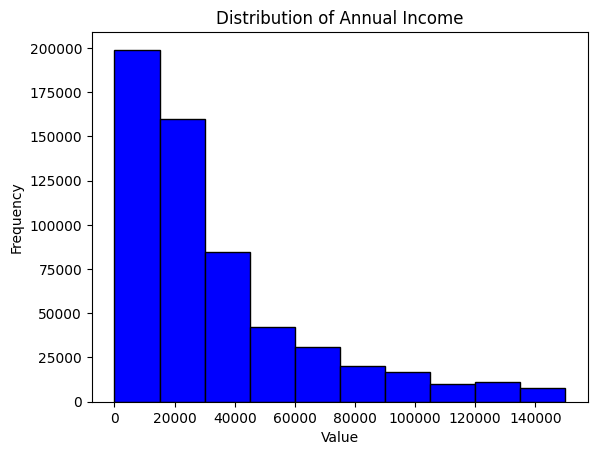

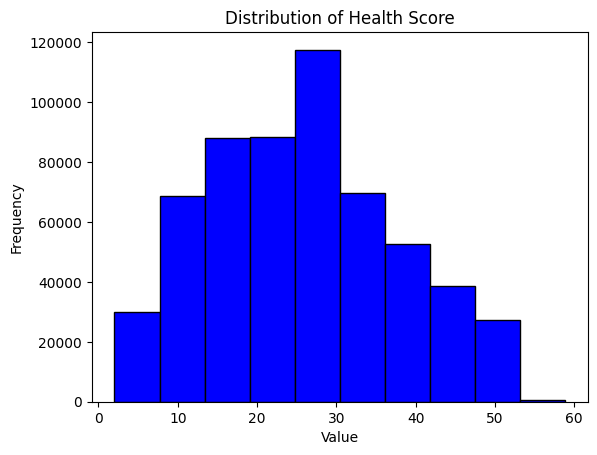

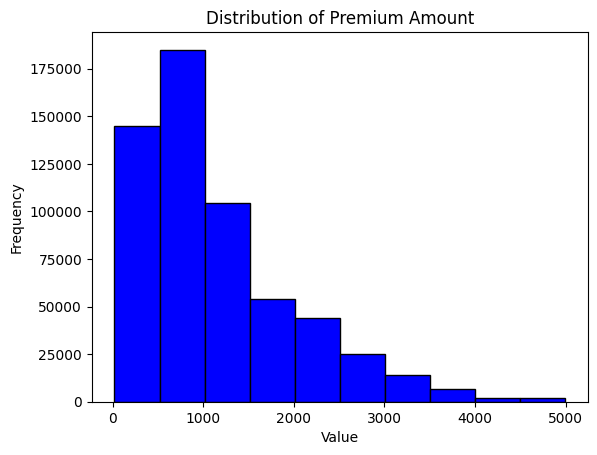

checking skewed distribution in test: 



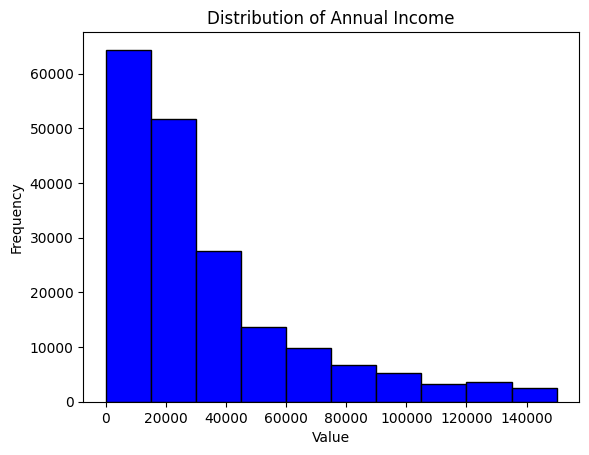

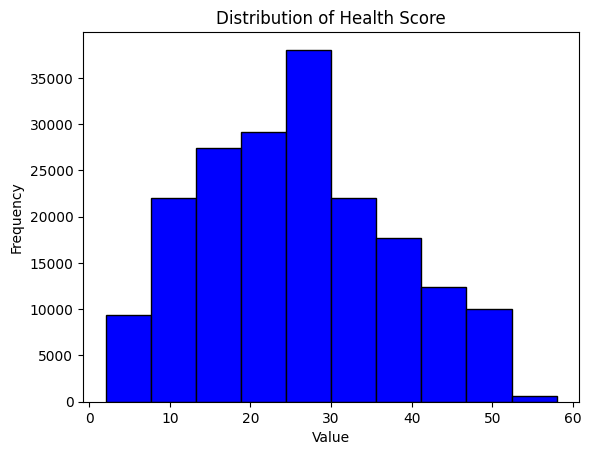

In [34]:
import matplotlib.pyplot as plt
skewed_cols=['Annual Income','Health Score','Premium Amount']
def plot_hist(df):
    for i in range(len(skewed_cols)):
        if skewed_cols[i] in df.columns:
            plt.hist(df[skewed_cols[i]], bins=10, color='blue', edgecolor='black')
            plt.title(f'Distribution of {skewed_cols[i]}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.show()
        else:
            continue
print('checking skewed distribution in train: \n')
plot_hist(train_df_cleaned)
print('checking skewed distribution in test: \n')
plot_hist(test_df_cleaned)

In [35]:
def applying_transformations(df):
    df['Health_Score_sqrt'] = df['Health Score'].apply(lambda x: np.cbrt(x))  # Add 1 to avoid log(0)
    df['Annual_Income_sqrt'] = df['Annual Income'].apply(lambda x: np.cbrt(x))  # Add 1 to avoid log(0)
    if 'Premium Amount' in df.columns:
        df['Premium_Amount_Score_sqrt'] = df['Premium Amount'].apply(lambda x: np.cbrt(x))# Add 1to avoid log(0)
    return df
train_df_cleaned = applying_transformations(train_df_cleaned)
test_df_cleaned = applying_transformations(test_df_cleaned)

checking skewed distribution in train: 



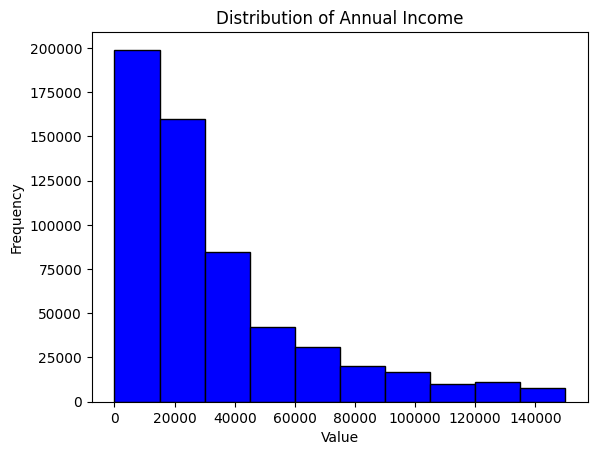

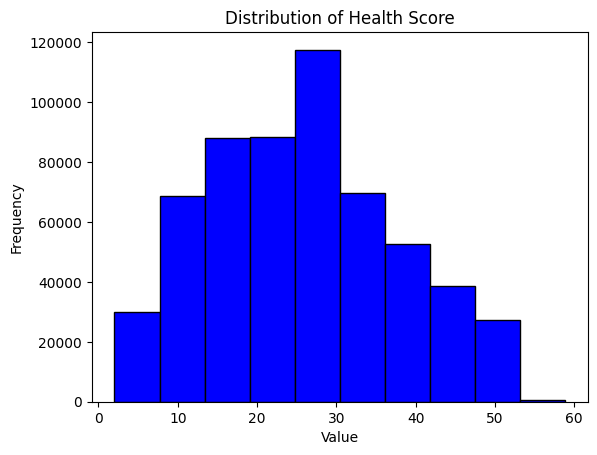

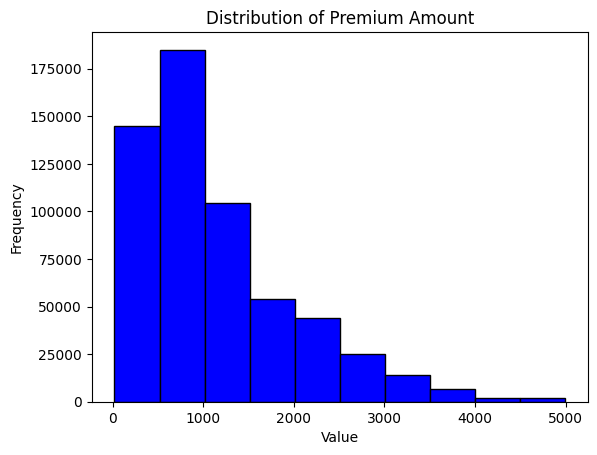

checking skewed distribution in test: 



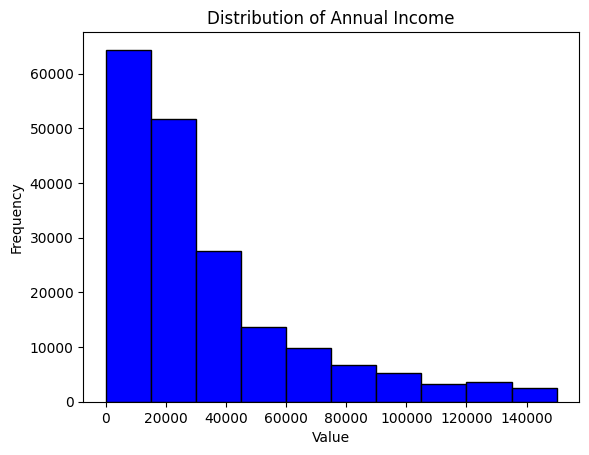

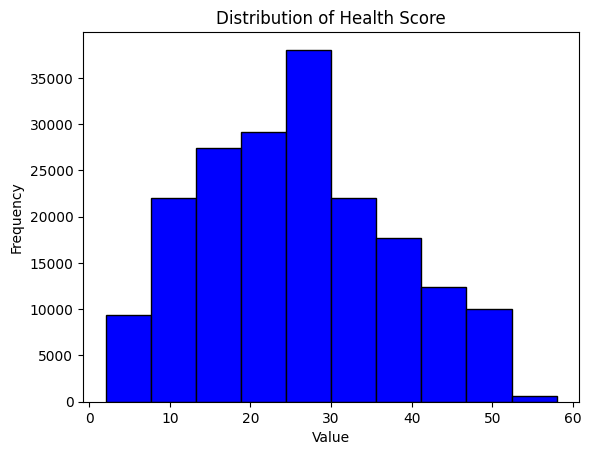

In [36]:
print('checking skewed distribution in train: \n')
plot_hist(train_df_cleaned)
print('checking skewed distribution in test: \n')
plot_hist(test_df_cleaned)

In [37]:
train_df_cleaned['Annual Income'].describe()

count    581884.000000
mean      32418.311999
std       32210.845765
min           2.000000
25%        8072.000000
50%       22162.000000
75%       44296.250000
max      149997.000000
Name: Annual Income, dtype: float64

Applying transformations to train set:
Initial Skewness of Annual Income: 1.4974531154148087
After transformations for Annual Income:
Annual Income_cbrt: Skewness = 0.11207061796574841


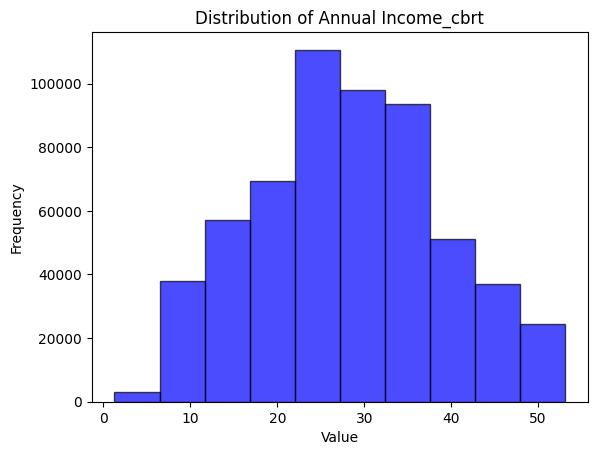

Annual Income_log: Skewness = -0.9840727236322059


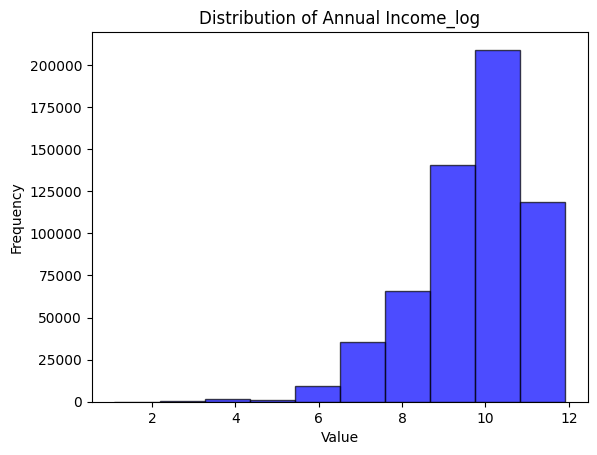

Annual Income_boxcox: Skewness = -0.07293448561695912


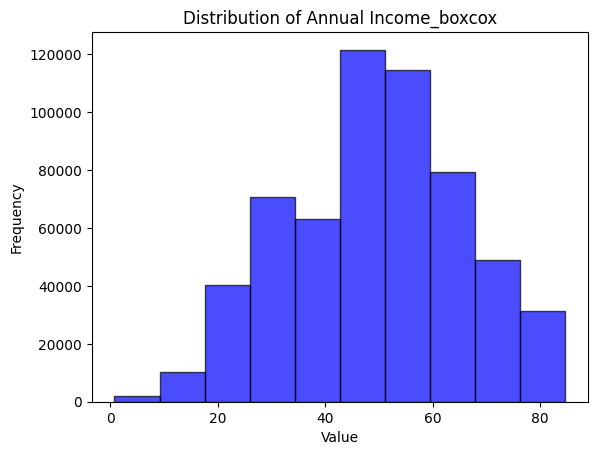

Annual Income_yeojohnson: Skewness = -0.07295335776606307


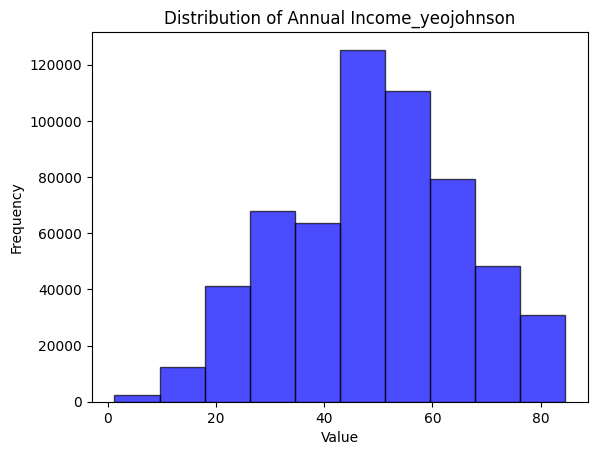

Initial Skewness of Health Score: 0.28183260793850523
After transformations for Health Score:
Annual Income_cbrt: Skewness = 0.11207061796574841


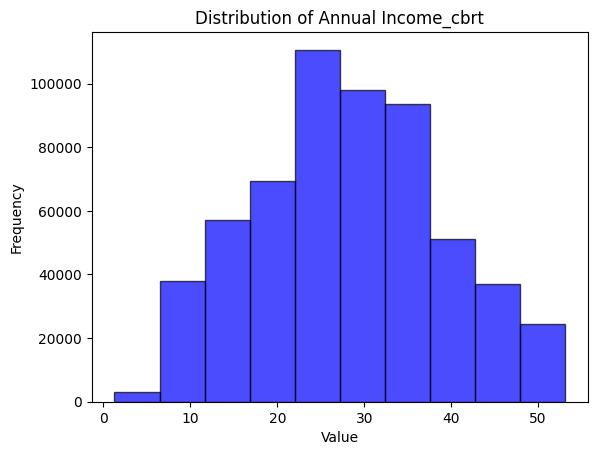

Annual Income_log: Skewness = -0.9840727236322059


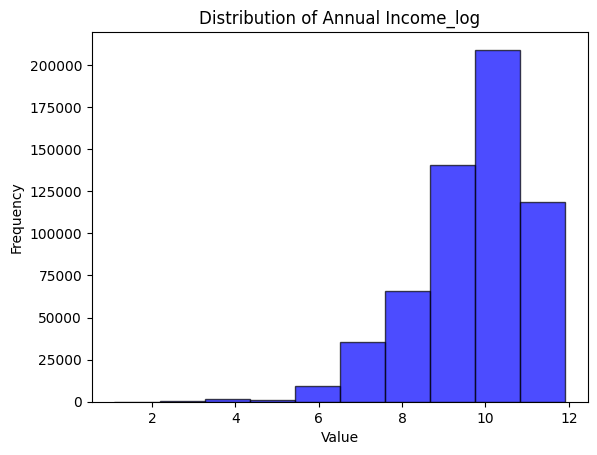

Annual Income_boxcox: Skewness = -0.07293448561695912


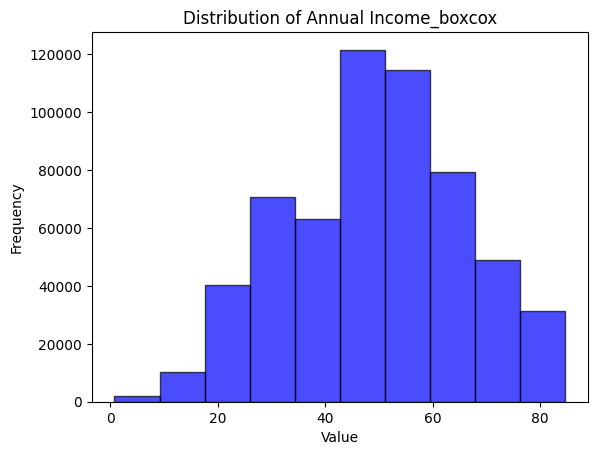

Annual Income_yeojohnson: Skewness = -0.07295335776606307


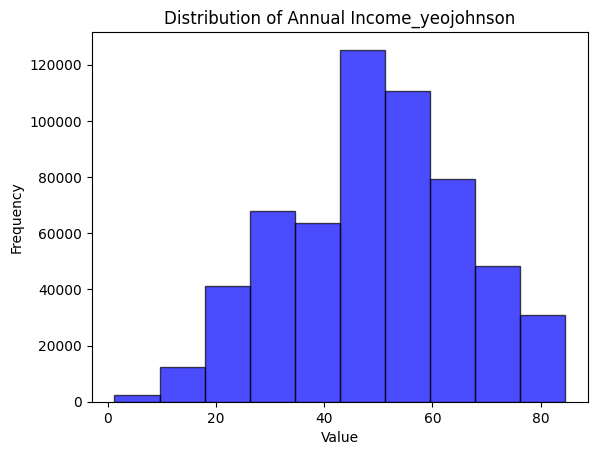

Health Score_cbrt: Skewness = -0.4330531785067407


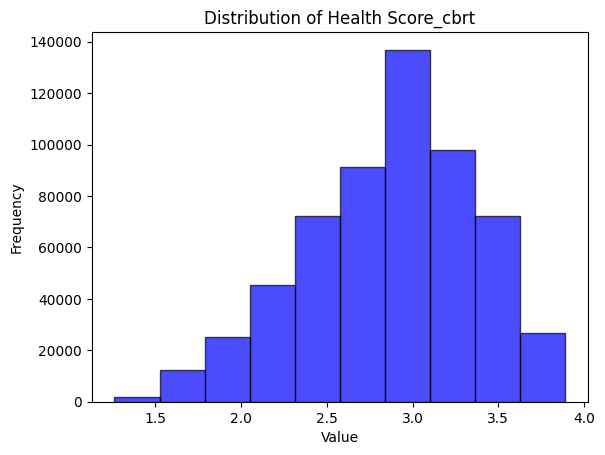

Health Score_log: Skewness = -0.7920431273101828


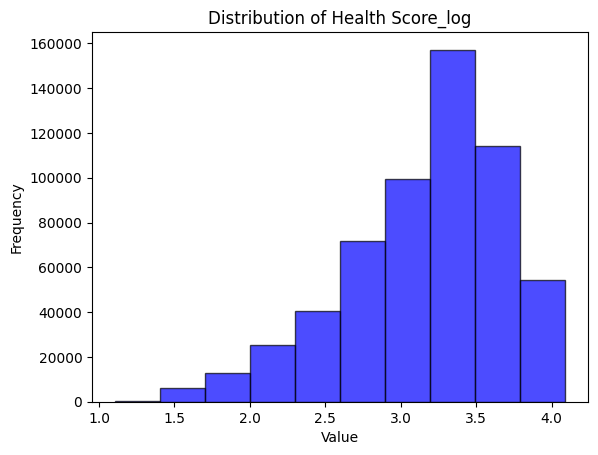

Health Score_boxcox: Skewness = -0.0825986246852311


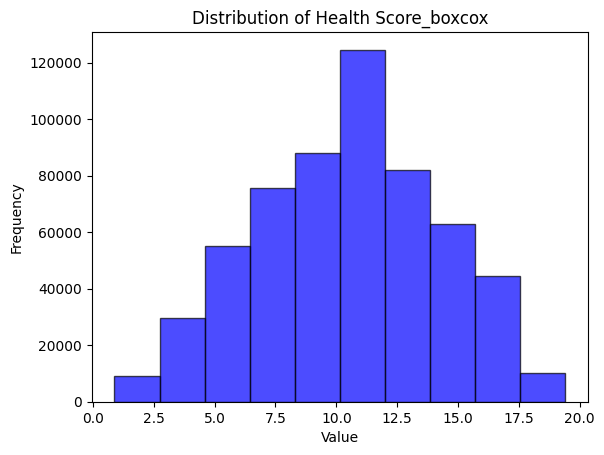

Health Score_yeojohnson: Skewness = -0.07602172543792515


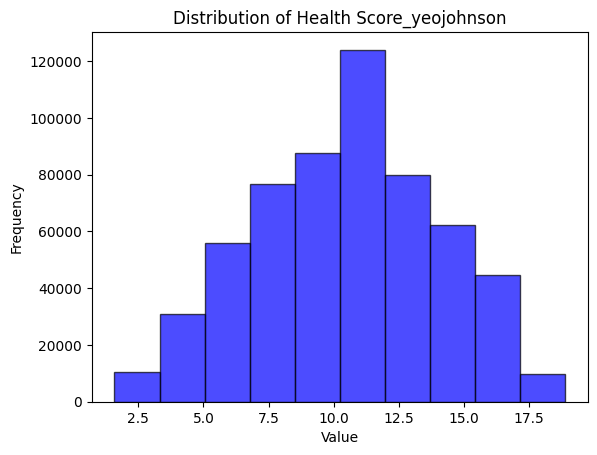

Initial Skewness of Premium Amount: 1.2247314242869725
After transformations for Premium Amount:
Annual Income_cbrt: Skewness = 0.11207061796574841


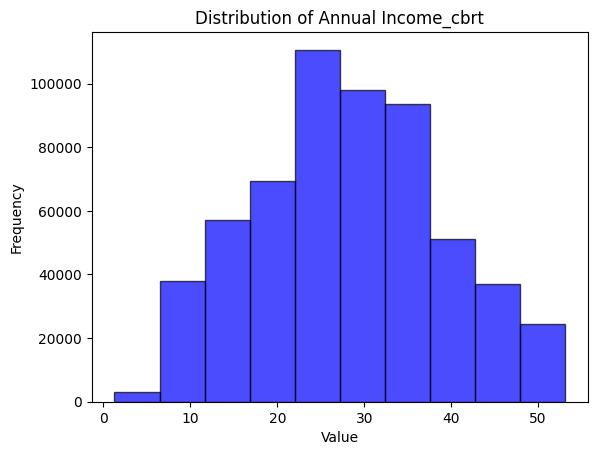

Annual Income_log: Skewness = -0.9840727236322059


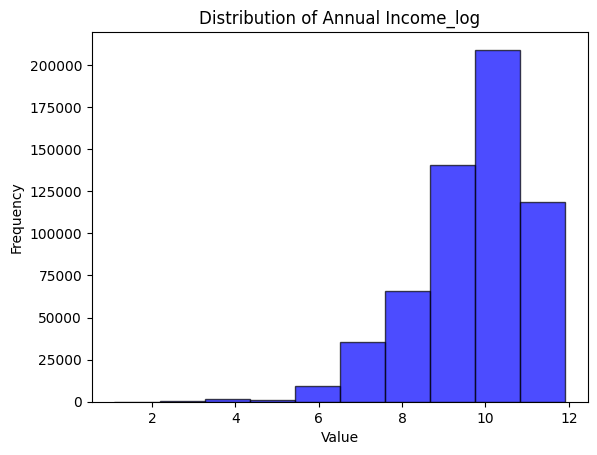

Annual Income_boxcox: Skewness = -0.07293448561695912


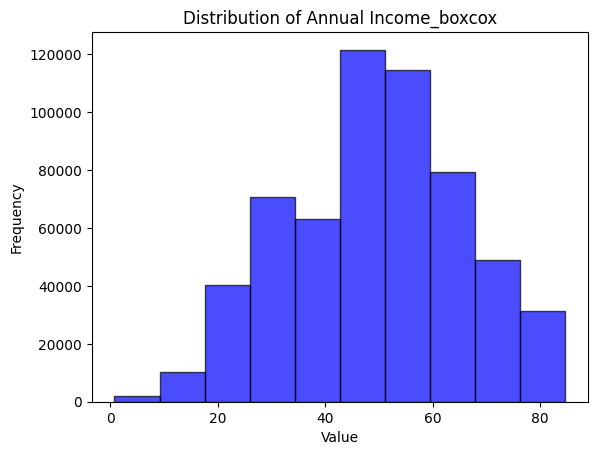

Annual Income_yeojohnson: Skewness = -0.07295335776606307


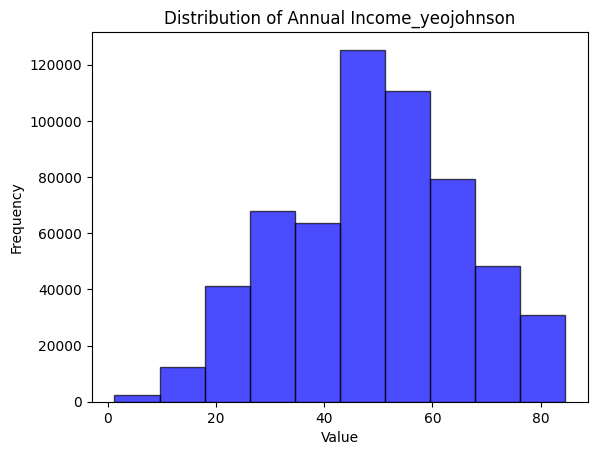

Health Score_cbrt: Skewness = -0.4330531785067407


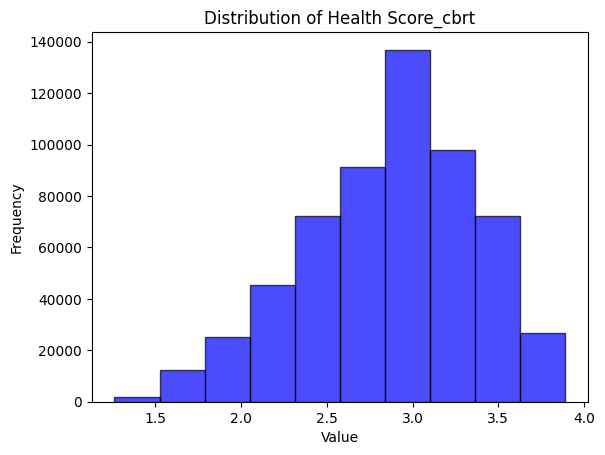

Health Score_log: Skewness = -0.7920431273101828


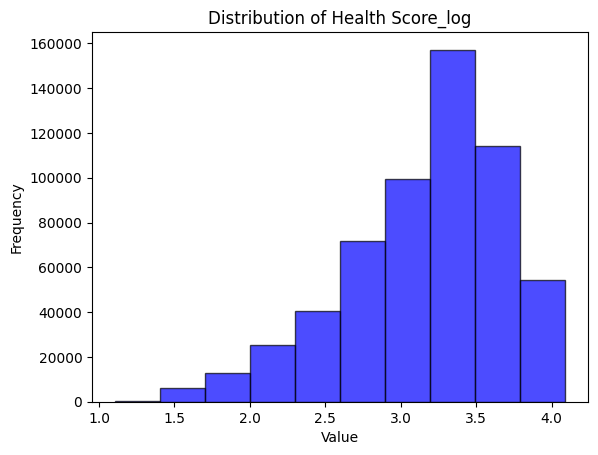

Health Score_boxcox: Skewness = -0.0825986246852311


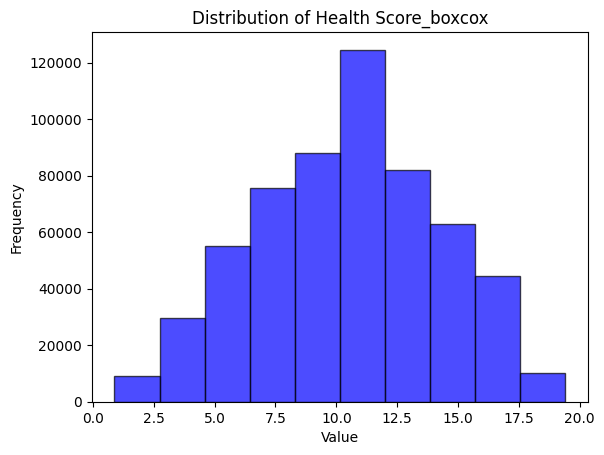

Health Score_yeojohnson: Skewness = -0.07602172543792515


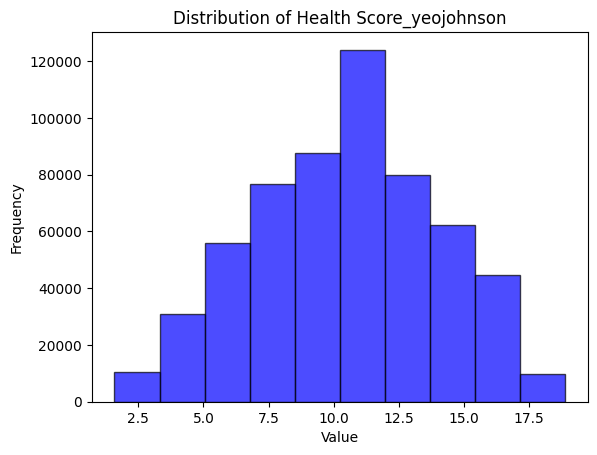

Premium Amount_cbrt: Skewness = -0.2500281167059566


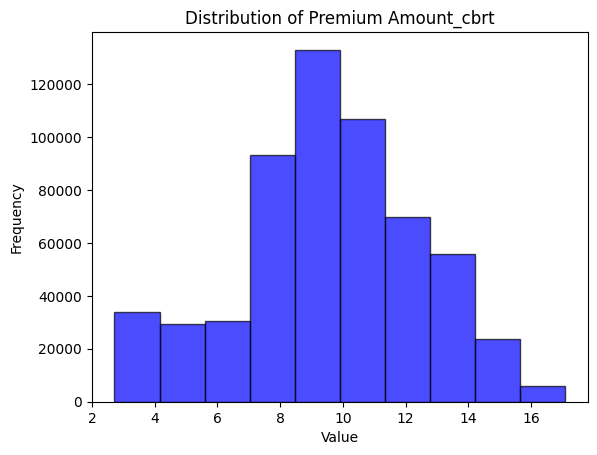

Premium Amount_log: Skewness = -1.2717474641398199


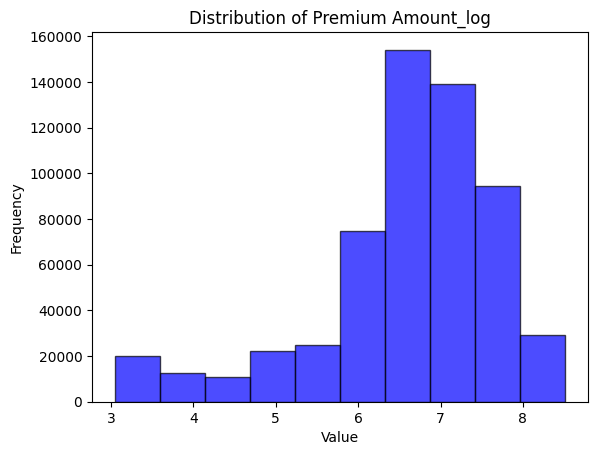

Premium Amount_boxcox: Skewness = -0.06001122720066081


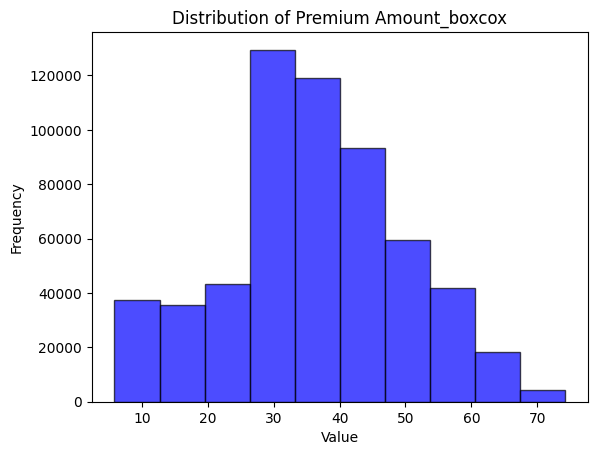

Premium Amount_yeojohnson: Skewness = -0.05939274944851509


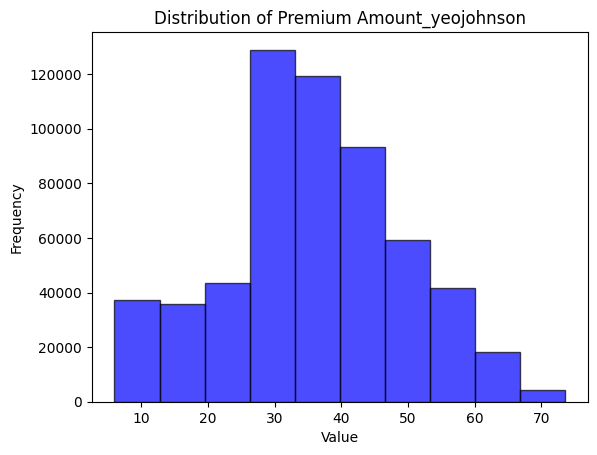

Applying transformations to test set:
Initial Skewness of Annual Income: 1.4977539672746971
After transformations for Annual Income:
Annual Income_cbrt: Skewness = 0.11305306215117442


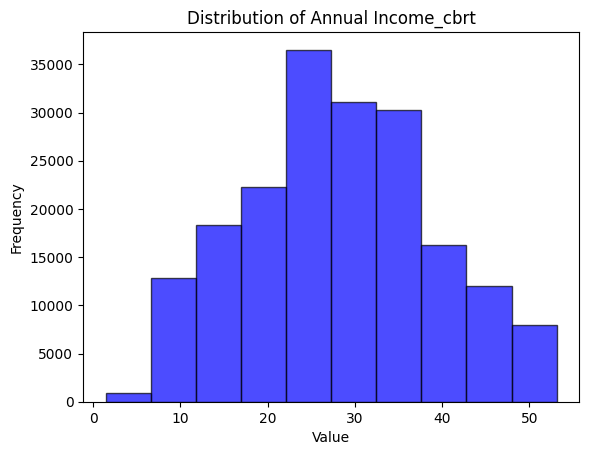

Annual Income_log: Skewness = -0.9808809713955271


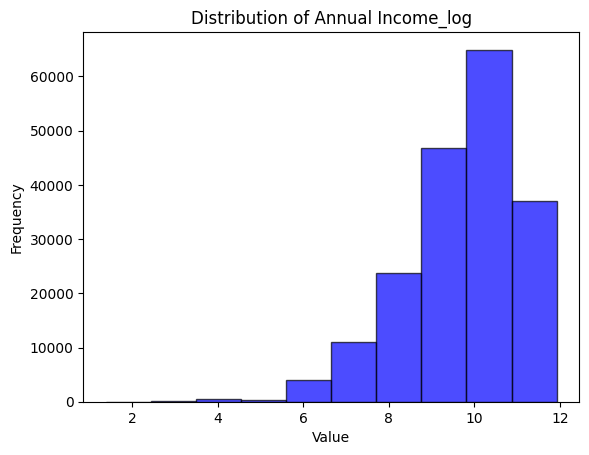

Annual Income_boxcox: Skewness = -0.07241188133053279


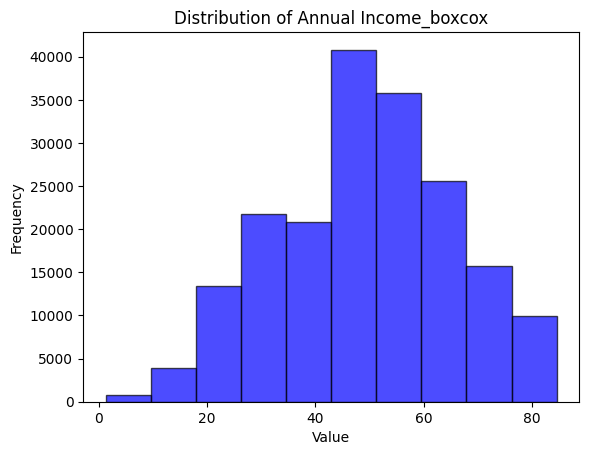

Annual Income_yeojohnson: Skewness = -0.07243075547033895


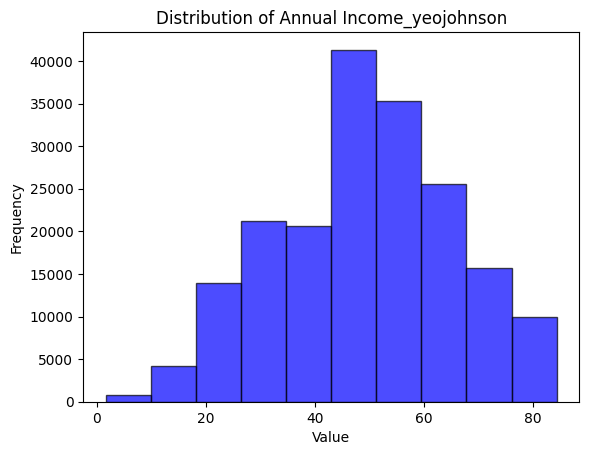

Initial Skewness of Health Score: 0.2868063164260085
After transformations for Health Score:
Annual Income_cbrt: Skewness = 0.11305306215117442


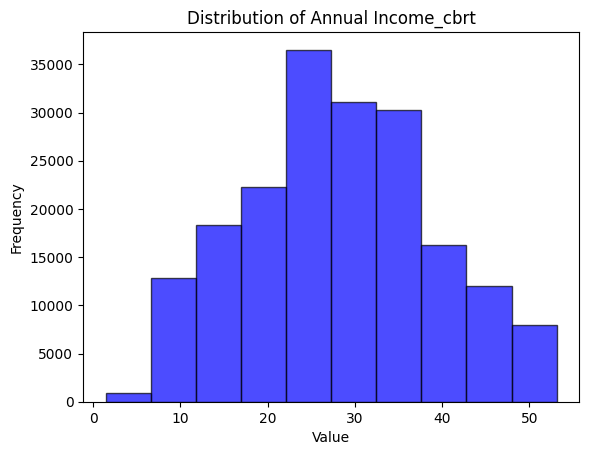

Annual Income_log: Skewness = -0.9808809713955271


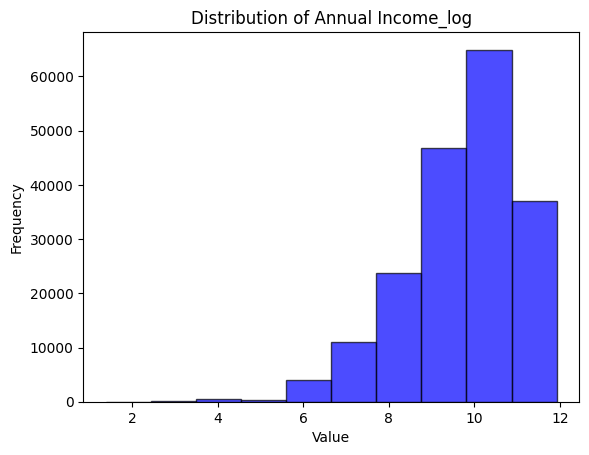

Annual Income_boxcox: Skewness = -0.07241188133053279


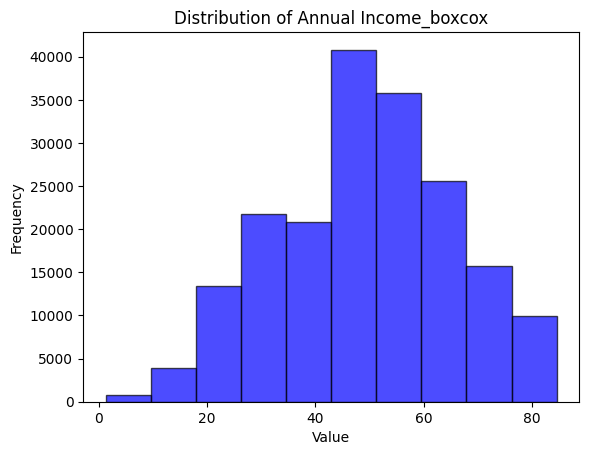

Annual Income_yeojohnson: Skewness = -0.07243075547033895


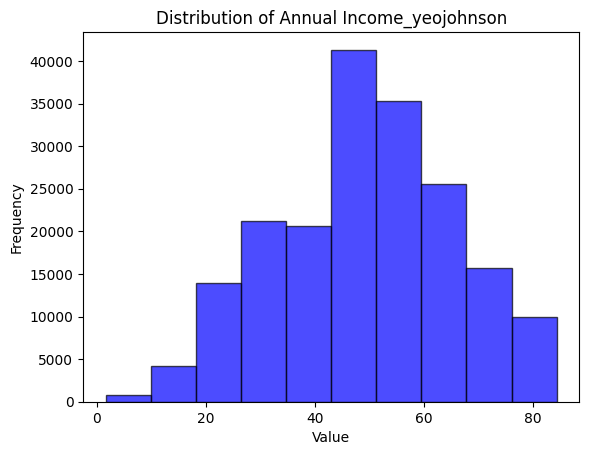

Health Score_cbrt: Skewness = -0.43022483505821996


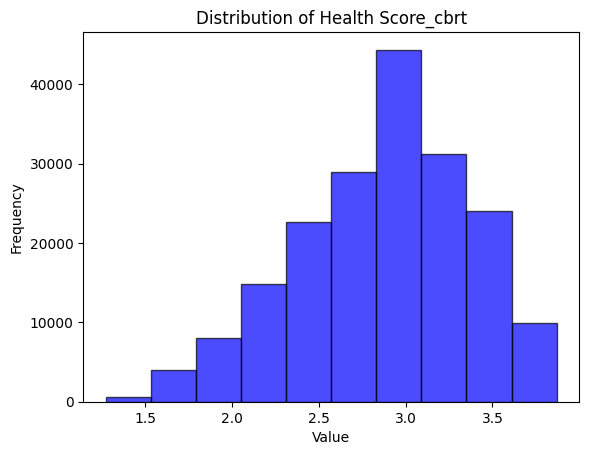

Health Score_log: Skewness = -0.7908746458966059


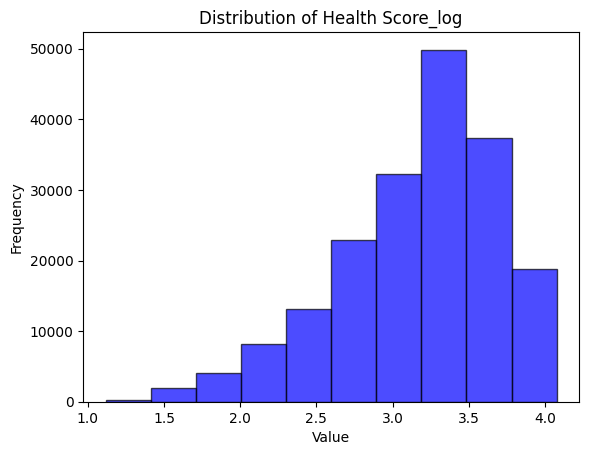

Health Score_boxcox: Skewness = -0.08101985430220036


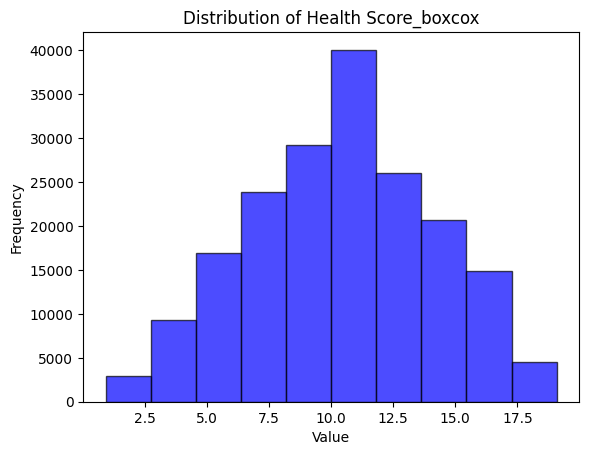

Health Score_yeojohnson: Skewness = -0.07456558162486852


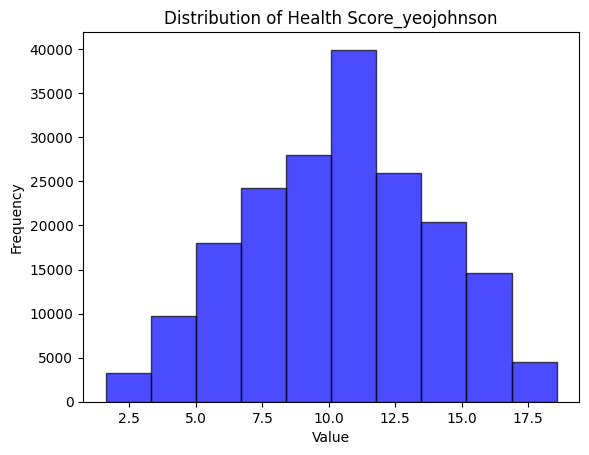

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson
from scipy.stats import shapiro

# Function to visualize the distribution
def plot_hist(df, col):
    plt.hist(df[col], bins=10, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Applying transformations
def applying_transformations(df):
    transformations = {}
    for col in skewed_cols:
        if col in df.columns:
            # Check initial skewness
            print(f"Initial Skewness of {col}: {df[col].skew()}")

            # Apply cube root transformation
            df[f'{col}_cbrt'] = np.cbrt(df[col])
            transformations[f'{col}_cbrt'] = df[f'{col}_cbrt'].skew()

            # Apply log transformation
            df[f'{col}_log'] = np.log1p(df[col])
            transformations[f'{col}_log'] = df[f'{col}_log'].skew()

            # Apply Box-Cox transformation (requires positive values)
            if (df[col] > 0).all():
                df[f'{col}_boxcox'], _ = boxcox(df[col] + 1e-6)
                transformations[f'{col}_boxcox'] = pd.Series(df[f'{col}_boxcox']).skew()

            # Apply Yeo-Johnson transformation
            df[f'{col}_yeojohnson'], _ = yeojohnson(df[col])
            transformations[f'{col}_yeojohnson'] = pd.Series(df[f'{col}_yeojohnson']).skew()

            # Plot transformed distributions
            print(f"After transformations for {col}:")
            for key, value in transformations.items():
                print(f"{key}: Skewness = {value}")
                plot_hist(df, key)

    return df

# Apply transformations to train and test sets
print('Applying transformations to train set:')
train_df_cleaned = applying_transformations(train_df_cleaned)

print('Applying transformations to test set:')
test_df_cleaned = applying_transformations(test_df_cleaned)

#annual income - cbrt, 